<a href="https://colab.research.google.com/github/Guillermina0406/Data-analysis-with-Python/blob/main/Final_Proyect_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final – Análisis de Ventas de Automóviles Durante Periodos de Recesión

En este trabajo se te presentarán varias preguntas para analizar datos con el fin de comprender las tendencias históricas en las ventas de automóviles durante períodos de recesión.

---

## 🕒 Períodos de recesión incluidos

- **Recesión 1:** Año 1980  
- **Recesión 2:** Años 1981 a 1982  
- **Recesión 3:** Año 1991  
- **Recesión 4:** Años 2000 a 2001  
- **Recesión 5:** Desde finales de 2007 hasta mediados de 2009  
- **Recesión 6:** Desde febrero hasta abril de 2020 *(Impacto de Covid-19)*

> ⚠️ Los datos utilizados han sido creados artificialmente con fines educativos. No se usaron datos reales.

---

## 🧾 Descripción del Dataset

El conjunto de datos incluye las siguientes variables:

- **Date:** Fecha de la observación  
- **Recession:** Variable binaria (1 = recesión, 0 = normal)  
- **Automobile_Sales:** Número de vehículos vendidos  
- **GDP:** PIB per cápita en USD  
- **Unemployment_Rate:** Tasa de desempleo mensual  
- **Consumer_Confidence:** Índice sintético de confianza del consumidor  
- **Seasonality_Weight:** Efecto estacional en las ventas  
- **Price:** Precio promedio del vehículo  
- **Advertising_Expenditure:** Gasto en publicidad  
- **Vehicle_Type:** Tipo de vehículo vendido  
- **Competition:** Nivel de competencia en el mercado  
- **Month:** Mes (extraído de la fecha)  
- **Year:** Año (extraído de la fecha)  



---



## Parte 1: Visualizaciones con Matplotlib, Seaborn y Folium

### 🎯 Objetivo

Analizar las tendencias históricas en las ventas de automóviles durante recesiones para XYZAutomotives.

### 🛠️ Tareas

- **TAREA 1.1**: Gráfico de líneas con pandas mostrando la evolución anual de ventas.  
- **TAREA 1.2**: Gráfico por tipo de vehículo. ¿Existen diferencias en recesiones?  
- **TAREA 1.3**: Visualización con Seaborn para comparar ventas en recesión vs no-recesión.  
- **TAREA 1.4**: Subplots de PIB en periodos de recesión y no-recesión.  
- **TAREA 1.5**: Bubble plot del impacto de la estacionalidad en ventas.  
- **TAREA 1.6**: Scatter plot de precio promedio vs volumen de ventas.  
- **TAREA 1.7**: Gráfico circular del gasto publicitario en recesión y no-recesión.  
- **TAREA 1.8**: Gráfico circular por tipo de vehículo en recesión.  
- **TAREA 1.9**: Gráfico de líneas del desempleo vs ventas por tipo de vehículo.


In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium
%pip install dash plotly pyngrok
%pip install dash plotly httpx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px
from pyngrok import ngrok

In [ ]:
import pandas as pd
import requests
import io  # <- Este import es el que faltaba

# URL del dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Descargar el contenido del archivo CSV
response = requests.get(url)
response.raise_for_status()  # Verifica que la descarga fue exitosa

# Leer el contenido en un DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Mostrar mensaje
print("¡Datos descargados y cargados en un DataFrame!")

# Ver las primeras filas del dataset
df.head()



¡Datos descargados y cargados en un DataFrame!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

**TAREA 1.1**

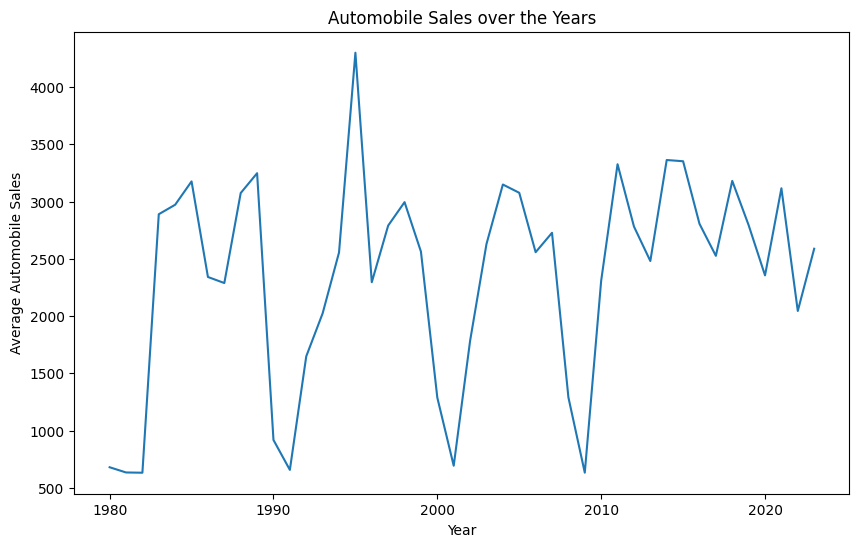

In [ ]:
import matplotlib.pyplot as plt
df_line = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales over the Years')
plt.show()

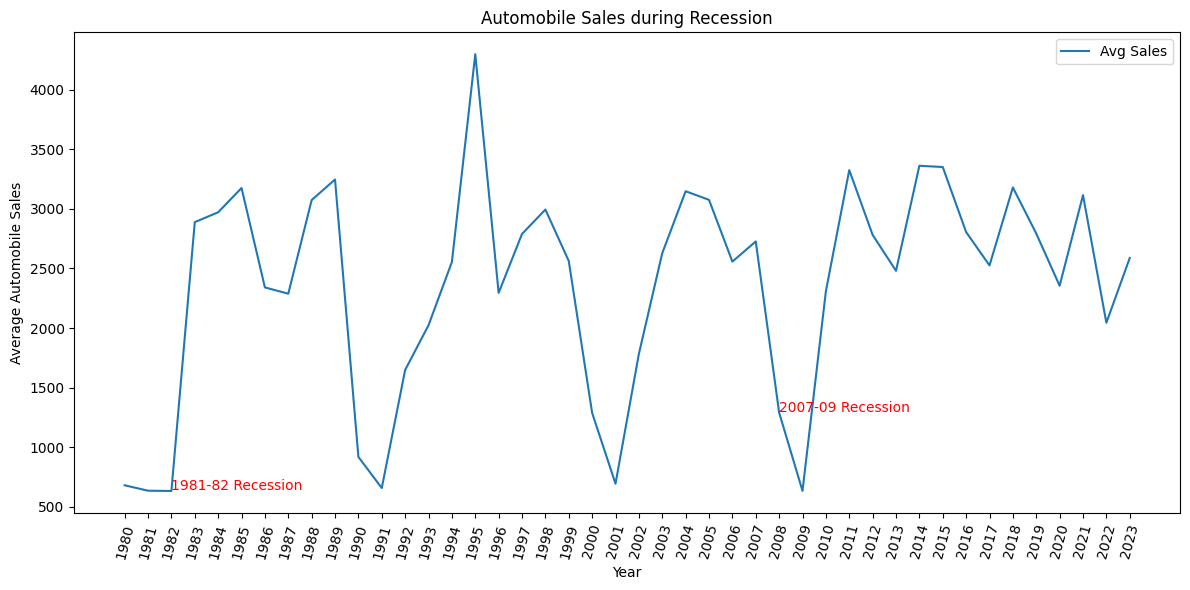

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por año y calcular el promedio de ventas de autos
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Crear el gráfico
plt.figure(figsize=(12, 6))
df_line.plot(kind='line')

# Ticks de 1980 a 2023 rotados para mejor lectura
plt.xticks(list(range(1980, 2024)), rotation=75)

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

# Anotaciones para años de recesión
plt.text(1982, df_line.loc[1982] + 5, '1981-82 Recession', color='red')
plt.text(2008, df_line.loc[2008] + 5, '2007-09 Recession', color='red')

# Mostrar leyenda y gráfico
plt.legend(['Avg Sales'])
plt.tight_layout()
plt.show()


**TAREA 1.2**

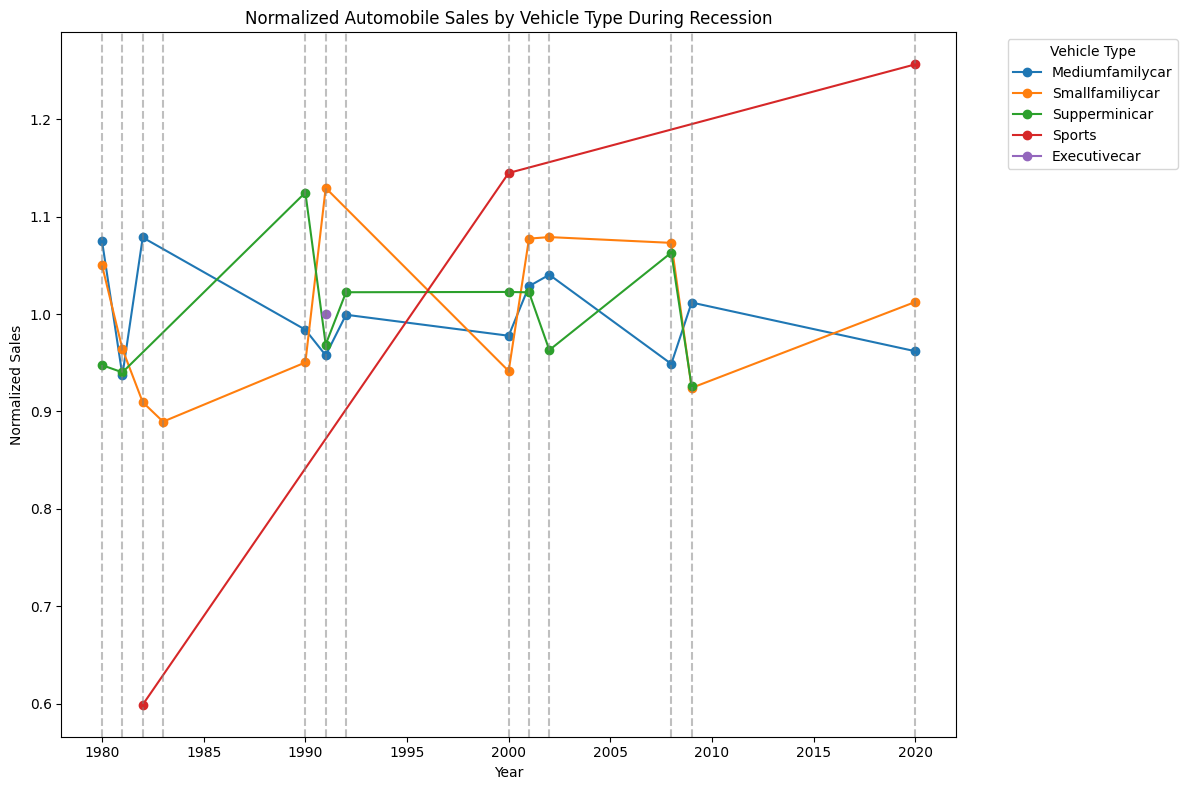

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo los períodos de recesión
df_rec = df[df['Recession'] == 1]

# Calcular el promedio de ventas por año y tipo de vehículo durante la recesión
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Normalizar las ventas dividiendo por el promedio de ventas de cada tipo de vehículo
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Establecer 'Year' como índice
df_Mline.set_index('Year', inplace=True)

# Crear el gráfico de líneas por tipo de vehículo
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Resaltar años de recesión
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Agregar etiquetas y título
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

plt.tight_layout()
plt.show()


### ✅ Conclusión basada en el gráfico

El gráfico muestra las **ventas normalizadas de automóviles por tipo de vehículo durante períodos de recesión**. Al analizar las líneas:

- **Los autos deportivos** (línea roja) presentan una **tendencia claramente ascendente**, lo que indica que sus ventas no solo se mantienen, sino que incluso crecen durante la recesión. Esto sugiere que el **segmento de lujo es más estable** y menos afectado por las crisis económicas.

- **Los supermini** (línea verde) también muestran una **resiliencia destacada**, con variaciones pero manteniéndose cerca o por encima del promedio, lo cual podría deberse a que son vehículos más accesibles económicamente y preferidos en tiempos de incertidumbre.

- **Los autos familiares medianos** (azul) y **los autos familiares pequeños** (naranja) tienen líneas más **fluctuantes e inestables**, lo que refleja una **mayor sensibilidad al contexto económico**. Sus ventas tienden a bajar o mantenerse en niveles más bajos en comparación con otros tipos.

En resumen, **hay una diferencia clara en las tendencias de ventas** durante las recesiones entre los tipos de vehículos: mientras que los **autos deportivos y supermini** muestran **estabilidad o crecimiento**, los **autos familiares** tienden a verse **más afectados**.


**TAREA 1.3**

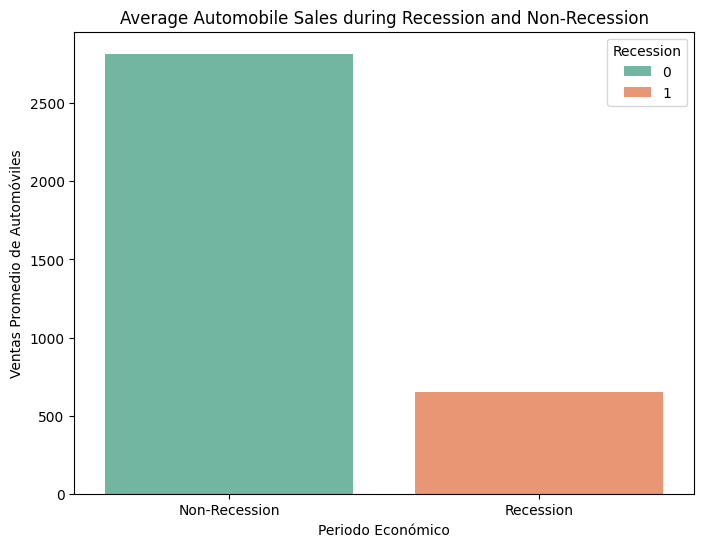

In [ ]:
# Agrupar por período de recesión y calcular el promedio de ventas
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df, palette='Set2')

# Etiquetas y título
plt.xlabel('Periodo Económico')
plt.ylabel('Ventas Promedio de Automóviles')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

# Mostrar gráfico
plt.show()


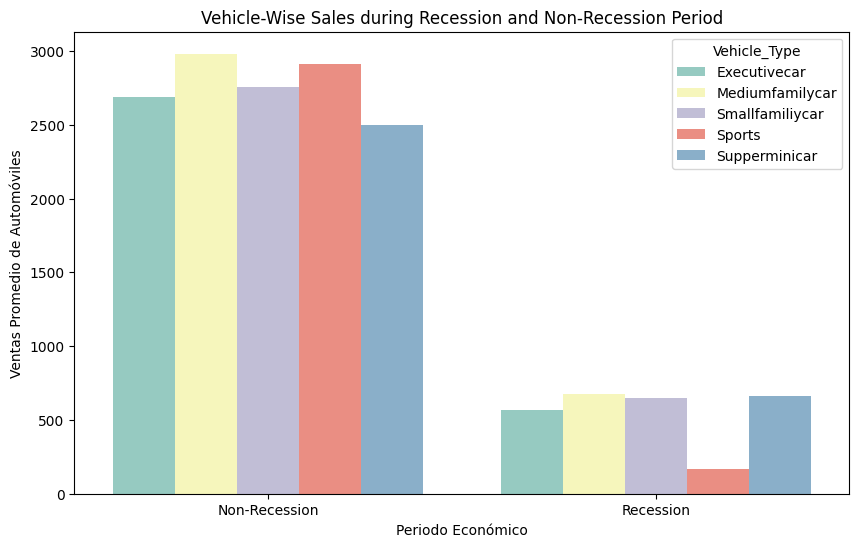

In [ ]:
# Agrupar por período de recesión y tipo de vehículo, y calcular el promedio de ventas
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Crear el gráfico de barras agrupadas con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df, palette='Set3')

# Ajustar etiquetas y título
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Periodo Económico')
plt.ylabel('Ventas Promedio de Automóviles')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

# Mostrar gráfico
plt.show()


### 📊 Vehicle-Wise Sales during Recession and Non-Recession Period

Durante los períodos de recesión, se observa que:

- **Las ventas promedio disminuyen** para la mayoría de los tipos de vehículos en comparación con los períodos sin recesión.
- Sin embargo, **los autos deportivos y supermini** tienden a mantener sus niveles de ventas o incluso mostrar cierta estabilidad, lo que sugiere que:
  - 🚗 Los deportivos están menos afectados por la economía (consumidores de lujo).
  - 🚙 Los supermini son una opción más económica y práctica durante tiempos difíciles.
- **Los autos familiares medianos y pequeños** muestran una **caída más pronunciada**, indicando que este segmento es más sensible a los cambios económicos.

---

✅ **Conclusión**:  
El impacto de la recesión **no es uniforme entre los distintos tipos de vehículos**. Algunos segmentos como el de lujo (deportivos) o los más accesibles (supermini) **resisten mejor las crisis**, mientras que otros, como los familiares, **sufren más en sus ventas**.


**TAREA 1.4**

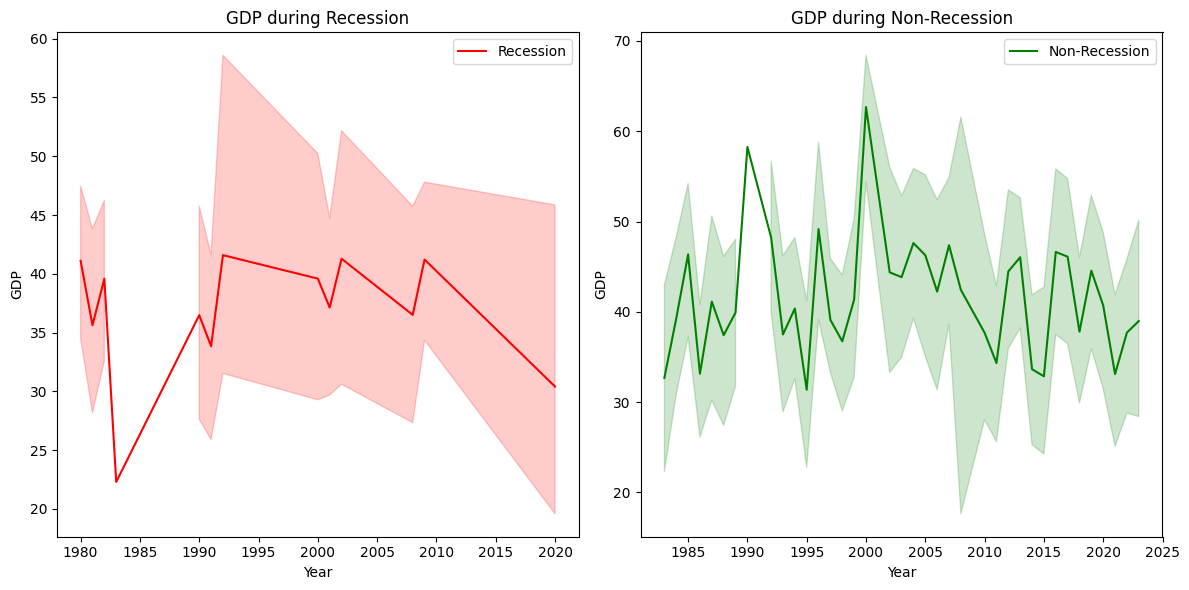

In [ ]:
# Crear dataframes separados
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(12, 6))

# Subplot 1: Recession
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', color='red')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP during Recession')
plt.legend()

# Subplot 2: Non-Recession
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', color='green')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP during Non-Recession')
plt.legend()

plt.tight_layout()
plt.show()


### 📈 Comparación de la Variación del PIB (GDP) durante Períodos de Recesión y No Recesión

A partir de los gráficos de líneas que muestran la evolución del PIB en ambos períodos, se pueden observar los siguientes patrones:

- Durante los **períodos de recesión**, el PIB muestra una **tendencia descendente o inestable**, con caídas marcadas. Esto refleja claramente el impacto económico negativo de las crisis, donde la producción y actividad económica disminuyen.

- En contraste, durante los **períodos sin recesión**, el PIB tiende a **mantener una trayectoria ascendente o más estable**, lo que indica crecimiento económico y condiciones favorables para el desarrollo del mercado.

---

✅ **Conclusión**:  
Existe una relación clara entre los períodos de recesión y la caída del PIB. Esto refuerza la idea de que las recesiones afectan no solo las ventas de automóviles, sino también el crecimiento económico general del país.


**TAREA 1.5**

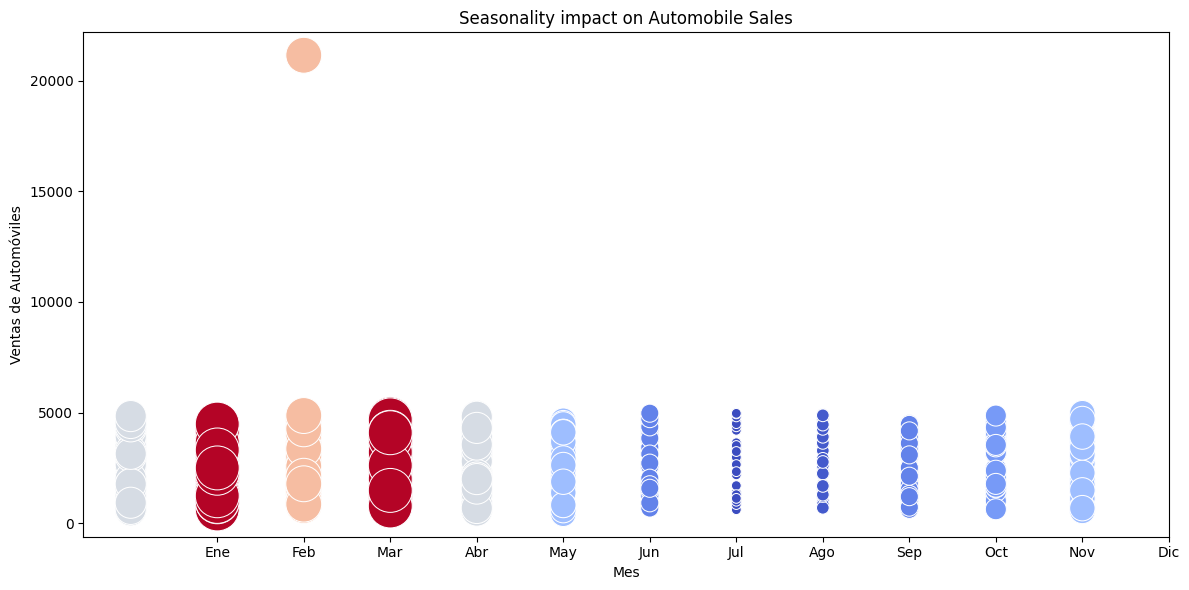

In [ ]:
# Filtrar datos solo para años sin recesión
non_rec_data = df[df['Recession'] == 0]

# Definir tamaño de burbujas basado en la estacionalidad
size = non_rec_data['Seasonality_Weight']

# Crear gráfico de burbujas
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=non_rec_data,
    x='Month',
    y='Automobile_Sales',
    size=size,
    hue='Seasonality_Weight',
    legend=False,
    sizes=(50, 1000),  # ajustar el rango visual del tamaño de burbuja
    palette='coolwarm'
)

plt.xlabel('Mes')
plt.ylabel('Ventas de Automóviles')
plt.title('Seasonality impact on Automobile Sales')
plt.xticks(ticks=range(1, 13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])

plt.tight_layout()
plt.show()


### 🔵 Impacto de la Estacionalidad en las Ventas de Automóviles

El gráfico de burbujas revela que, en general, la estacionalidad **no parece tener un efecto significativo** sobre las ventas de automóviles en los años sin recesión. Las ventas se mantienen relativamente estables durante la mayoría de los meses.

📌 Sin embargo, se observa un **aumento notable en el mes de abril**, lo que sugiere un posible comportamiento atípico o una campaña comercial específica durante ese mes.

✅ **Conclusión**:  
Aunque la mayoría de los meses no presentan grandes variaciones, el **mes de abril muestra un incremento abrupto en las ventas**, lo que podría indicar una oportunidad estacional específica o una excepción al patrón general.


**TAREA 1.6**

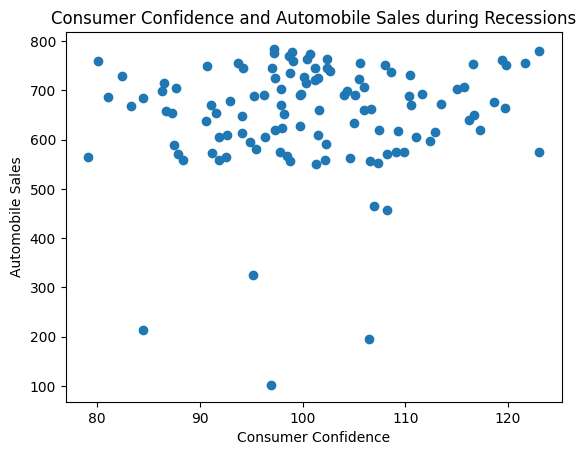

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos solo para periodos de recesión
rec_data = df[df['Recession'] == 1]

# Crear scatter plot para identificar la relación entre confianza del consumidor y ventas de autos
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Etiquetas y título
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Mostrar gráfico
plt.show()


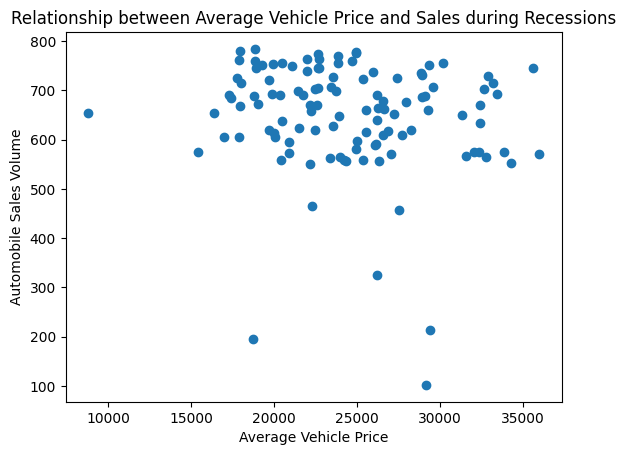

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos solo para periodos de recesión
rec_data = df[df['Recession'] == 1]

# Scatter plot Precio promedio del vehículo vs Ventas de autos
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Etiquetas y título
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales Volume')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

# Mostrar gráfico
plt.show()


Relación poco clara o débil entre precio promedio y volumen de ventas:

No se observa una tendencia lineal clara (ni positiva ni negativa) entre el precio promedio del vehículo y el volumen de ventas durante los períodos de recesión.

Los puntos están bastante dispersos, lo que sugiere que otros factores además del precio influyen en las ventas.

Volumen de ventas relativamente estable:

La mayoría de los puntos se concentran en un rango de volumen de ventas entre 600 y 750 unidades, incluso cuando los precios varían entre $10.000 y $35.000.

Esto sugiere que, durante recesión, las ventas no disminuyen drásticamente con precios más altos, lo que podría implicar un mercado con demanda inelástica o bien segmentado.

Presencia de outliers:

Hay algunos valores atípicos (outliers) con ventas muy bajas (~100-300 unidades) que podrían deberse a modelos específicos o situaciones particulares dentro del período recesivo.

Estrategias de marketing u otros factores podrían ser clave:

Dado que el precio no parece ser el principal determinante del volumen de ventas durante recesión, otros factores como promociones, campañas publicitarias, financiamiento o disponibilidad podrían estar desempeñando un papel más importante.

**TAREA 1.7**

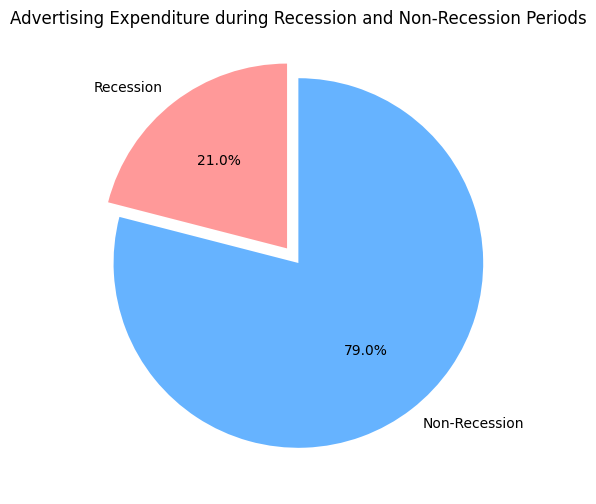

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos para recesión y no recesión
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calcular la suma del gasto publicitario en ambos periodos
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Crear gráfico de torta
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=(0.1, 0))

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


## Interpretación del gráfico de gasto publicitario durante recesión y no recesión

El gráfico muestra la proporción del gasto total en publicidad que XYZAutomotives destinó durante los períodos de recesión y no recesión.

- Si la porción correspondiente a la recesión es significativamente menor que la de no recesión, esto indicaría que la empresa redujo su inversión publicitaria en tiempos difíciles, posiblemente para recortar costos ante la caída en ventas o incertidumbre económica.
- Por otro lado, si el gasto en publicidad durante la recesión es comparable o incluso mayor, podría sugerir que la empresa decidió mantener o aumentar su esfuerzo de marketing para sostener la demanda y diferenciarse frente a la competencia.
- También es posible que el gasto publicitario sea relativamente estable, mostrando una estrategia equilibrada sin grandes recortes ni incrementos.

En resumen, la comparación visual permite entender la estrategia de XYZAutomotives frente a la fluctuación económica, y si el marketing es un área prioritaria incluso en tiempos de crisis.


**TAREA 1.8**

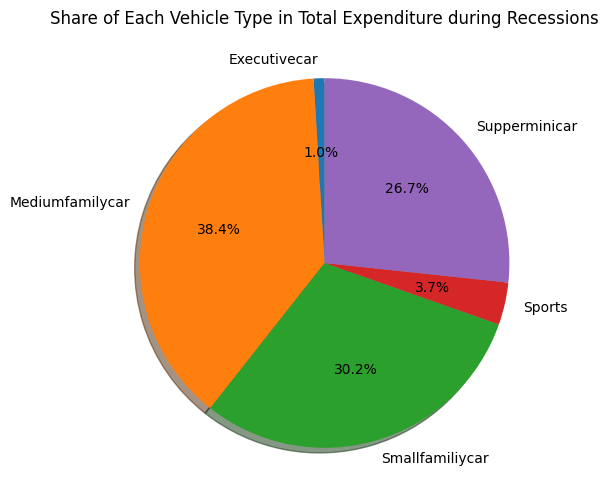

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos solo para periodo de recesión
Rdata = df[df['Recession'] == 1]

# Agrupar por tipo de vehículo y sumar el gasto en publicidad durante recesión
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Crear gráfico de torta para mostrar la participación de cada tipo de vehículo
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()


**TAREA 1.9**

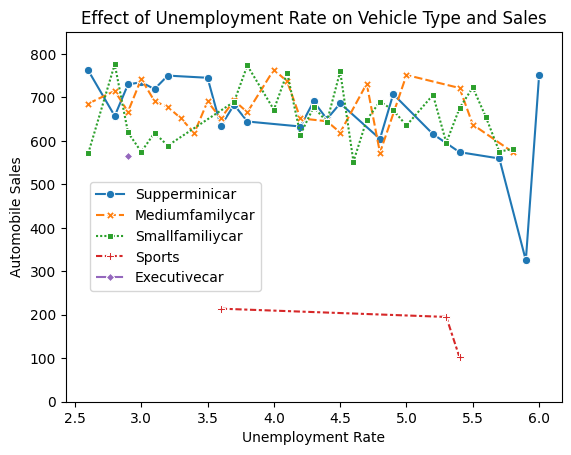

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos solo para recesión
df_rec = df[df['Recession'] == 1]

# Crear lineplot para analizar efecto del desempleo sobre ventas por tipo de vehículo
sns.lineplot(
    data=df_rec,
    x='unemployment_rate',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    style='Vehicle_Type',
    markers=True,
    err_style=None
)

plt.ylim(0, 850)  # Ajusta el límite según tus datos
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc=(0.05, 0.3))
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.show()


## Insights sobre las ventas de Superminicar, Smallfamilycar y Mediumminicar durante la recesión

A partir del gráfico que muestra el efecto de la tasa de desempleo sobre las ventas por tipo de vehículo durante el período de recesión, se pueden observar los siguientes puntos:

- **Superminicar:** Las ventas tienden a mantenerse relativamente estables o presentan una ligera disminución conforme aumenta la tasa de desempleo. Esto puede indicar que los consumidores ven a este tipo de vehículo como una opción accesible y económica durante tiempos de incertidumbre económica.

- **Smallfamilycar:** Las ventas muestran una tendencia a disminuir a medida que la tasa de desempleo crece, lo que sugiere que la demanda por vehículos familiares pequeños se ve afectada más notablemente por el aumento del desempleo.

- **Mediumminicar:** Este tipo de vehículo parece mostrar una caída más pronunciada en ventas con el aumento de la tasa de desempleo, reflejando que los consumidores pueden estar priorizando vehículos más económicos o postergando la compra de autos medianos durante la recesión.

En general, el efecto del aumento del desempleo parece impactar negativamente las ventas de todos estos tipos de vehículos, pero con distinta intensidad según la categoría, lo que refleja preferencias y restricciones presupuestarias cambiantes en el contexto económico adverso.


**TAREA 1.10**
Crear un mapa coroplético con folium sobre las ventas por ciudad durante recesión.

In [ ]:
import folium
import pandas as pd

# Filtrar datos solo para recesión
recession_data = df[df['Recession'] == 1]

# Sumar ventas por ciudad
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Cargar archivo GeoJSON con los límites de estados (ya descargado)
filename = "us-states.json"

# Crear mapa base centrado en USA
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Crear capa coroplética
choropleth = folium.Choropleth(
    geo_data=filename,
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',  # Mapeo con propiedad del GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Agregar tooltips con nombre del estado
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Mostrar mapa
map1



---

## Parte 2: Dashboard con Plotly y Dash

### 🎯 Objetivo

Diseñar dashboards interactivos para que los directores de XYZAutomotives puedan explorar los datos sin depender de nuevos reportes.

### 🛠️ Tareas

- **TAREA 2.1**: Crear una aplicación Dash con un título significativo  
- **TAREA 2.2**: Agregar menús desplegables con opciones apropiadas  
- **TAREA 2.3**: Divisiones para mostrar resultados con ID y clase CSS  
- **TAREA 2.4**: Crear callbacks para actualizar datos según selección  
- **TAREA 2.5**: Gráficos para estadísticas de recesión  
- **TAREA 2.6**: Gráficos para estadísticas anuales

## Escenario

El objetivo de esta parte del **Trabajo Final** es **analizar las tendencias históricas en las ventas de automóviles durante períodos de recesión**, como hiciste en la parte anterior. El propósito es **proporcionar información sobre cómo se vieron afectadas las ventas de XYZAutomotives**, una empresa especializada en ventas de automóviles, durante los períodos de recesión.

En esta entrega final, **tendrás la oportunidad de demostrar las habilidades en creación de dashboards (tableros interactivos)** que adquiriste en este curso.

Este laboratorio tiene como objetivo evaluar tus capacidades para **crear diferentes visualizaciones utilizando Plotly y Dash**. Como científico/a de datos, se te ha asignado la tarea de preparar un informe con tus hallazgos basados en el análisis de datos de ventas de automóviles.

Has decidido desarrollar un tablero que represente **dos informes principales**:

---

## 1. Estadísticas Anuales de Ventas de Automóviles

Este informe consta principalmente de los siguientes elementos:

- **Ventas Anuales de Automóviles (Gráfico de líneas):**  
  Muestra el promedio de ventas de automóviles por año a lo largo de todo el período.

- **Ventas Mensuales Totales de Automóviles (Gráfico de líneas):**  
  Muestra las ventas totales de automóviles por mes en el año seleccionado.

- **Promedio de Vehículos Vendidos por Tipo de Vehículo (Gráfico de barras):**  
  Muestra el número promedio de vehículos vendidos por cada tipo de vehículo en el año seleccionado.

- **Gasto Total en Publicidad por Tipo de Vehículo (Gráfico de pastel):**  
  Representa el gasto total en publicidad por tipo de vehículo en el año seleccionado.

---

## 2. Estadísticas Durante el Período de Recesión

- **Fluctuación Promedio de Ventas de Automóviles Durante Recesiones (por año - Gráfico de líneas):**  
  Muestra el promedio de ventas de automóviles por año durante los períodos de recesión.

- **Número Promedio de Vehículos Vendidos por Tipo de Vehículo (Gráfico de barras):**  
  Muestra el número promedio de vehículos vendidos por cada tipo durante los períodos de recesión.

- **Participación en el Gasto Total en Publicidad por Tipo de Vehículo (Gráfico de pastel):**  
  Representa la distribución del gasto total en publicidad por tipo de vehículo durante los períodos de recesión.

- **Efecto de la Tasa de Desempleo en las Ventas por Tipo de Vehículo (Gráfico de barras):**  
  Muestra cómo afecta la tasa de desempleo a las ventas de automóviles, diferenciando por tipo de vehículo, durante los períodos de recesión.



## Requisitos para crear el Dashboard esperado

### Menús desplegables:

Se deben crear **dos menús desplegables (dropdowns)**:

1. **Primer dropdown**: permite seleccionar el tipo de informe:
   - Estadísticas Anuales (*Yearly Statistics*)
   - Estadísticas del Período de Recesión (*Recession Period Statistics*)

2. **Segundo dropdown**: permite seleccionar el **año**.  
   Este debe estar habilitado **solo cuando el usuario selecciona "Estadísticas Anuales"**, y **debe estar deshabilitado** si se elige "Estadísticas del Período de Recesión".

> 📌 Cada dropdown debe colocarse dentro de una división (Div) separada.

> 📚 Puedes consultar [esta guía de Dash](https://dash.plotly.com/dash-core-components/dropdown) para entender cómo funcionan los menús desplegables en Plotly Dash.

---

## Estructura del Layout de la App

Debes definir el **layout** de la aplicación, que incluirá:

- Títulos principales
- Menús desplegables (dropdowns)
- Contenedores para mostrar la salida (gráficos)

---

## Funciones Callback para Interactividad

### 1. Actualizar el Contenedor de Entrada (Input Container)

Debes definir una **función callback** para actualizar el contenedor de entrada basado en la estadística seleccionada.

**Objetivo:**  
Controlar el estado del menú de selección de año.

- Retornar **True (habilitado)** cuando se seleccione *Estadísticas Anuales*, permitiendo al usuario elegir un año.
- Retornar **False (deshabilitado)** cuando se seleccione *Estadísticas del Período de Recesión*, ya que no corresponde elegir un año.

---

### 2. Callback para Generar los Gráficos (Plotting)

Se debe definir otra función **callback** que:

- Reciba la selección de estadísticas y año (si corresponde).
- Genere los gráficos apropiados en el contenedor de salida.

---

## Distribución de los Gráficos

Los **cuatro gráficos** deben mostrarse en una **disposición de 2 filas y 2 columnas**.

---

> 📝 **NOTA IMPORTANTE:**  
> Para cada tarea, deberás **guardar una captura de pantalla o imagen** del resultado final, la cual se te solicitará durante la etapa de **Entrega Final** para la evaluación.


In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium
%pip install dash plotly pyngrok
%pip install dash plotly httpx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización con matplotlib y seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#%matplotlib inline  # Solo en Jupyter/Colab

# Mapas interactivos
import folium

# Dash para construir dashboards
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Plotly para gráficos interactivos
import plotly.express as px
import plotly.graph_objs as go

# Ngrok para exponer app Dash en la web
from pyngrok import ngrok

# Extra (si lo vas a usar)
import more_itertools  # Solo si realmente lo necesitas


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/InaFqKi-TlmTZwlzKvlNaQ/DV0101EN-Final-Assign-Part-2-Questions.py
# Mostrar contenido del archivo descargado
with open("DV0101EN-Final-Assign-Part-2-Questions.py", "r") as f:
    print(f.read())

--2025-06-02 21:29:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/InaFqKi-TlmTZwlzKvlNaQ/DV0101EN-Final-Assign-Part-2-Questions.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6813 (6.7K) [application/x-python]
Saving to: ‘DV0101EN-Final-Assign-Part-2-Questions.py’

DV0101EN-Final-Assi 100%[===================>]   6.65K  --.-KB/s    in 0s      

2025-06-02 21:29:03 (883 MB/s) - ‘DV0101EN-Final-Assign-Part-2-Questions.py’ saved [6813/6813]

#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly

In [ ]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')


In [ ]:

# Inicializar app
app = dash.Dash(__name__)
app.title = "Automobile Statistics Dashboard"

# Lista de años
year_list = sorted(data['Year'].unique())

# Layout de la app
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard",
            style={'textAlign': 'left', 'color': '#503D36', 'font-size': 24}),

    html.Div([
        html.Label("Select Statistics:", style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Statistics'}
            ],
            placeholder='Select a report type',
            value='Yearly Statistics',
            style={'width': '80%', 'padding': '3px','font-size': '20px', 'text-align-last': 'center', 'margin': 'auto'}
        )
    ], style={'width': '100%', 'margin': '20px 0', 'textAlign': 'center'}),

    html.Div([
        html.Label("Select Year:", style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': str(i), 'value': i} for i in year_list],
            placeholder='Select-year',
            value=None,
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center', 'margin': 'auto'}
        )
    ], style={'width': '100%', 'margin': '20px 0', 'textAlign': 'center'}),

    html.Div(id='chart-grid', className='output-container', style={'display': 'flex', 'flexDirection': 'column'})
])

# Callback para habilitar/deshabilitar año
@app.callback(
    Output('select-year', 'disabled'),
    Input('dropdown-statistics', 'value')
)
def update_year_dropdown(statistic_type):
    return statistic_type == 'Recession Statistics'

# Callback para actualizar gráficos
@app.callback(
    Output('chart-grid', 'children'),
    [Input('dropdown-statistics', 'value'),
     Input('select-year', 'value')]
)
def update_output(statistic_type, input_year):
    if statistic_type == 'Recession Statistics':
        recession_data = data[data['Recession'] == 1]

        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
                    title="Average Automobile Sales over Recession Period"))

        avg_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(figure=px.bar(avg_sales, x='Vehicle_Type', y='Automobile_Sales',
                                           title="Average Vehicles Sold by Type (Recession)"))

        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type',
                                           title="Ad Expenditure Share by Vehicle Type (Recession)"))

        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                                           title='Effect of Unemployment Rate on Vehicle Sales'))

        return [
            html.Div([R_chart1, R_chart2], style={'display': 'flex', 'justifyContent': 'space-around'}),
            html.Div([R_chart3, R_chart4], style={'display': 'flex', 'justifyContent': 'space-around'})
        ]

    elif statistic_type == 'Yearly Statistics' and input_year:
        yearly_data = data[data['Year'] == input_year]

        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales',
                                            title='Average Automobile Sales per Year'))

        mas = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas, x='Month', y='Automobile_Sales',
                                            title='Total Monthly Automobile Sales'))

        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                                           title=f'Average Vehicles Sold by Type in {input_year}'))

        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
                                           title='Ad Expenditure by Vehicle Type'))

        return [
            html.Div([Y_chart1, Y_chart2], style={'display': 'flex', 'justifyContent': 'space-around'}),
            html.Div([Y_chart3, Y_chart4], style={'display': 'flex', 'justifyContent': 'space-around'})
        ]

    return html.Div("Please select an option.")

# Ejecutar app
if __name__ == '__main__':
    app.run(debug=True)

ngrok.set_auth_token("2v2QuYQKCo7NCqu9WPbOFyYzexv_4odMFKepyummjn69J9CQh")  # solo la primera vez, luego podés omitir esta línea si ya está configurado
public_url = ngrok.connect(8050)
print("Public URL:", public_url)


<IPython.core.display.Javascript object>

Public URL: NgrokTunnel: "https://c502-34-75-64-38.ngrok-free.app" -> "http://localhost:8050"
